# Accidents Analysis

## Setup

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

df = pd.read_csv('accidents_data.csv')

df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [61]:
# Finding all columns
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [35]:
# finding missing values in data
missing_values = df.isna().sum().sort_values(ascending=False)

missing_values

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [60]:
missing_percentage_raw = round(missing_values/len(df)*100, 2)

missing_percentage_only = missing_percentage[missing_percentage>0]
missing_percentage_only = dict(sorted(missing_percentage_only.items(), key = lambda x: x[1], reverse=True))

missing_percentage_only

{'Number': 61.29,
 'Precipitation(in)': 19.31,
 'Wind_Chill(F)': 16.51,
 'Wind_Speed(mph)': 5.55,
 'Wind_Direction': 2.59,
 'Humidity(%)': 2.57,
 'Weather_Condition': 2.48,
 'Visibility(mi)': 2.48,
 'Temperature(F)': 2.43,
 'Pressure(in)': 2.08,
 'Weather_Timestamp': 1.78,
 'Airport_Code': 0.34,
 'Timezone': 0.13,
 'Nautical_Twilight': 0.1,
 'Civil_Twilight': 0.1,
 'Sunrise_Sunset': 0.1,
 'Astronomical_Twilight': 0.1,
 'Zipcode': 0.05}

In [59]:
full_columns = missing_percentage[missing_percentage==0]

full_columns

City               0.0
Street             0.0
Country            0.0
Junction           0.0
Start_Time         0.0
End_Time           0.0
Start_Lat          0.0
Turning_Loop       0.0
Traffic_Signal     0.0
Traffic_Calming    0.0
Stop               0.0
Station            0.0
Roundabout         0.0
Railway            0.0
No_Exit            0.0
Crossing           0.0
Give_Way           0.0
Bump               0.0
Amenity            0.0
Start_Lng          0.0
End_Lat            0.0
End_Lng            0.0
Distance(mi)       0.0
Description        0.0
Severity           0.0
Side               0.0
County             0.0
State              0.0
ID                 0.0
dtype: float64

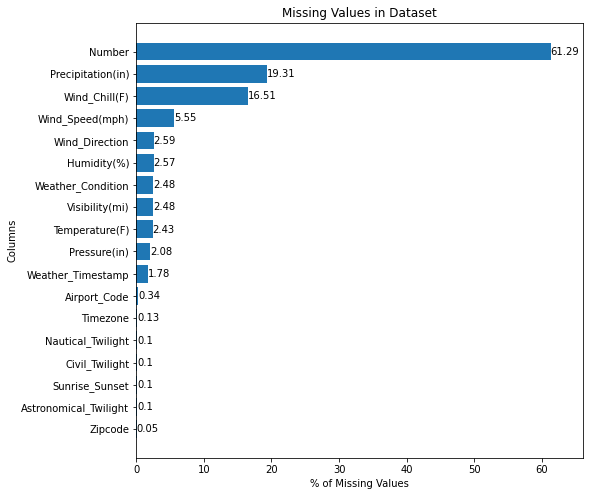

In [52]:
def plot_missing_percentage():
    name = missing_percentage_only.keys()
    value = missing_percentage_only.values()
    ypos = np.arange(len(name))
    fig, ax = plt.subplots()
    hbars = ax.barh(ypos, value, align='center')

    ax.set_yticks(ypos, labels=name)
    ax.invert_yaxis()
    ax.set_xlabel('% of Missing Values')
    ax.set_ylabel('Columns')
    ax.set_title('Missing Values in Dataset')
    ax.bar_label(hbars)
    ax.set_xlim(right=66)

    fig.set_figheight(8)
    fig.set_figwidth(8)

    plt.ticklabel_format(axis='x', style='plain')
    plt.show()
plot_missing_percentage()

## Accidents per Top 12 Weather Conditions

In [20]:
# print(df['Weather_Condition'].unique())
"""
it would not be feasible to put all weather conditions and combinations onto one graph.
while it may be possible to include the combination conditions into one of the base conditions,
for the sake of simplicity, only the base weather conditions will be used.
"""

'\nit would not be feasible to put all weather conditions and combinations onto one graph.\nwhile it may be possible to include the combination conditions into one of the base conditions,\nfor the current sake of simplicity, only the base conditions will be used for this entire analysis\n'

In [21]:
weather_condition_df = df['Weather_Condition'].value_counts().head(12)
weather_condition_names = df['Weather_Condition'].value_counts().head(12).index.tolist()
weather_condition_values = df['Weather_Condition'].value_counts().head(12).tolist()

# print(weather_condition_df)
# print(weather_condition_names)
# print(weather_condition_values)

In [22]:
total_accidents = len(df)

total_general = 0
for i in weather_condition_df:
    total_general += i

print(f'Total Number of Accidents in Dataset: {total_accidents} (100%)\n')
print(f'Number of Accidents Without Multiple Weather Conditions: {total_general} ({round((total_general/total_accidents)*100, 2)}%)')

Total Number of Accidents in Dataset: 2845342 (100%)

Number of Accidents Without Multiple Weather Conditions: 2654475 (93.29%)


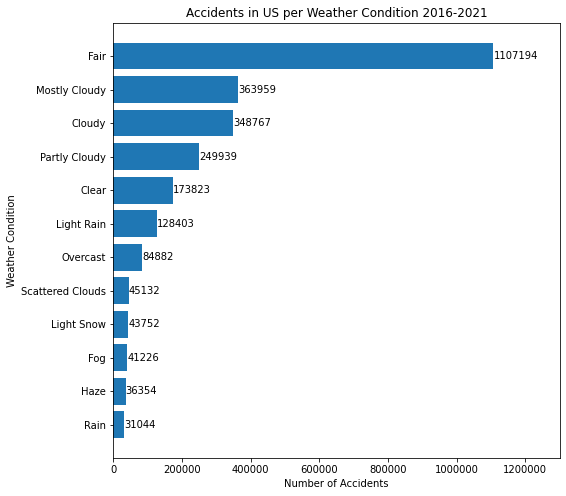

In [23]:
def plot_weather_accidents():
    ypos = np.arange(len(weather_condition_names))
    fig, ax = plt.subplots()
    hbars = ax.barh(ypos, weather_condition_values, align='center')

    ax.set_yticks(ypos, labels=weather_condition_names)
    ax.invert_yaxis()
    ax.set_xlabel('Number of Accidents')
    ax.set_ylabel('Weather Condition')
    ax.set_title('Accidents in US per Weather Condition 2016-2021')
    ax.bar_label(hbars, fmt='%d')
    ax.set_xlim(right=1300000)

    fig.set_figheight(8)
    fig.set_figwidth(8)

    plt.ticklabel_format(axis='x', style='plain')
    plt.show()
    
plot_weather_accidents()

# note that the total number of accidents used in this figure
# is about 93.3% of the number of accidents in the dataset
# as it does not include accidents with multiple weather conditions

In [24]:
"""
a majority of the accidents occur during "Fair" weather conditions, however it does also seem that cloudy conditions
have a substantial number of accidents
"""

'\na majority of the accidents occur during "Fair" weather conditions, however it does also seem that cloudy conditions\nhave a substantial number of accidents\n'

## Correlation Between Severity & Weather Conditions

In [25]:
print(df['Severity'].unique())
# damage severity is rated on a scale of 1-4 on this dataset, not great for indepth analysis

[3 2 4 1]


In [26]:
# average severity of accident per weather condition
def get_severity_avgs():
    severity_avgs = {}
    for i in weather_condition_names:
        temp_df = df.loc[df['Weather_Condition'] == i]
        temp_sum = temp_df['Severity'].sum()
        temp_count = temp_df['Severity'].count()
        temp_avg = round(temp_sum/temp_count, 3)
        severity_avgs[i] = temp_avg
    #     print(f'{i} {temp_avg}') 
    severity_avgs = dict(sorted(severity_avgs.items(), key = lambda x: x[1], reverse=True))
    return severity_avgs

severity_avgs = get_severity_avgs()
# print(severity_avgs)

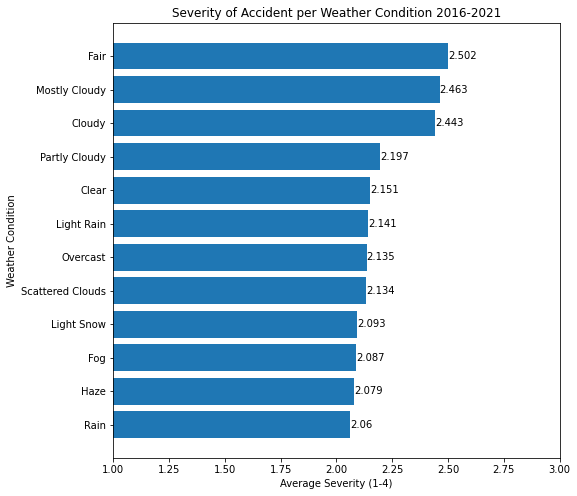

In [27]:
def plot_sev_weath_correlation():
    condition = list(severity_avgs.keys())
    severity = list(severity_avgs.values())

    ypos = np.arange(len(condition))
    fig, ax = plt.subplots()
    hbars = ax.barh(ypos, severity, align='center')

    ax.set_yticks(ypos, labels=weather_condition_names)
    ax.invert_yaxis()
    ax.set_xlabel('Average Severity (1-4)')
    ax.set_ylabel('Weather Condition')
    ax.set_title('Severity of Accident per Weather Condition 2016-2021')
    ax.bar_label(hbars, fmt='%g')
    ax.set_xlim(left=1, right=3)

    fig.set_figheight(8)
    fig.set_figwidth(8)

    plt.ticklabel_format(axis='x', style='plain')
    plt.show()

plot_sev_weath_correlation()

In [28]:
"""
the "Fair" weather condition seems to also have the most severe accidents on average.
additionally, there seems to be a correlation between the high number of accidents
and higher average severity under cloudy conditions.
"""

'\nthe "Fair" weather condition seems to also have the most severe accidents on average.\nadditionally, there seems to be a correlation between the high number of accidents\nand higher average severity under cloudy conditions.\n'

# Severity Percentages

In [29]:
"""
severity is ranked from a scale of 1-4
there are no titles to these rankings so these arbritrary ones below will be used
1: minor
2: moderate
3: severe
4: extremely severe
"""

'\nseverity is ranked from a scale of 1-4\nthere are no titles to these rankings so these arbritrary ones below will be used\n1: minor\n2: moderate\n3: severe\n4: extremely severe\n'

In [30]:
def get_severity_count():
    temp_series = pd.Series(dtype=float)
    for i in weather_condition_names:
        temp_df = df.loc[df['Weather_Condition'] == i]
        temp_count = temp_df['Severity'].value_counts().sort_index()
        temp_series = temp_series.add(temp_count, fill_value=0)
    temp_series = dict(sorted(temp_series.items(), key = lambda x: x[1], reverse=True))
    return temp_series

severity_count = get_severity_count()
print(severity_count)

{2: 2363181.0, 3: 144945.0, 4: 121631.0, 1: 24718.0}


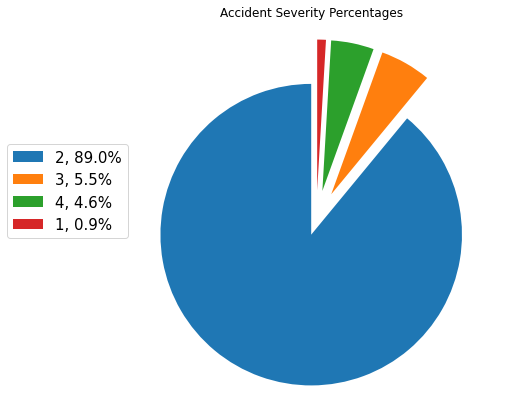

In [31]:
def plot_severity_percentages():
    labels = list(severity_count.keys())
    sizes = list(severity_count.values())
    explode = (0.1, 0.2, 0.2, 0.2)

    fig1, ax1 = plt.subplots(figsize=(7,7))
    ax1.pie(sizes, explode=explode, startangle=90)
    ax1.axis('equal')
    ax1.set_title('Accident Severity Percentages')

    plt.legend(
        loc='upper right',
        labels=['%s, %1.1f%%' % (
            l, (float(s) / total_general) * 100) for l, s in zip(labels, sizes)],
        prop={'size': 15},
        bbox_to_anchor=(0.05, 0.7),
    )


    plt.show()

plot_severity_percentages()

In [32]:
"""
the majority (89%) of accidents were of moderate severity (2), and the greatest
minority was of minor severity (1).
"""

'\nthe majority (89%) of accidents were of moderate severity (2), and the greatest\nminority was of minor severity (1).\n'

## Correlation Between Number of Accidents & Population Density

## Time of Day when Accidents Occur Most Often